## Importation of libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import PIL
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models

## Loading DatasetPath

In [2]:
import pathlib
data_dir=pathlib.Path("/content/drive/MyDrive/EL/Assignments/flowers")
data_dir

PosixPath('/content/drive/MyDrive/EL/Assignments/flowers')

## Fetching no of images in dataset

In [3]:
len(list(data_dir.glob('*/*.jpg')))

4337

## Loading images under its image names as dictionary

In [4]:
flower_images={
    'roses' : list(data_dir.glob('roses/*.jpg')),
    'tulips': list(data_dir.glob('tulips/*.jpg')),
    'dandelin':list(data_dir.glob('dandelin/*.jpg')),
    'sunflowers':list(data_dir.glob('sunflowers/*.jpg')),
    'daisy':list(data_dir.glob('daisy/*.jpg'))
}

## Assigning Labels for the names

In [5]:
flower_labels={
    'roses':0,
    'tulips':1,
    'dandelin':2,
    'sunflowers':3,
    'daisy':4
}

## Creating images list and its output label list

In [6]:
x,y=[],[]
for flower_name,images in flower_images.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(flower_labels[flower_name])

In [7]:
x = np.array(x)
y = np.array(y)

## Splitting Training and Testing Data

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

## Scaling - Preprocessing

In [9]:
X_train_scaled = x_train / 255
X_test_scaled = x_test / 255

## Image Augmentation

In [13]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.1)
  ]
)

## Original image and its augmented image

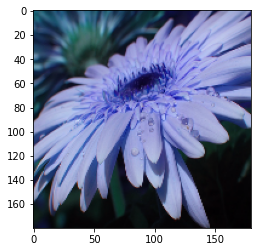

In [14]:
plt.imshow(x[0])

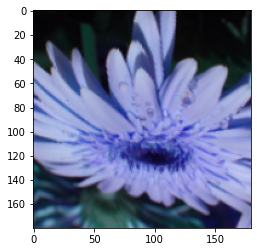

In [15]:
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))

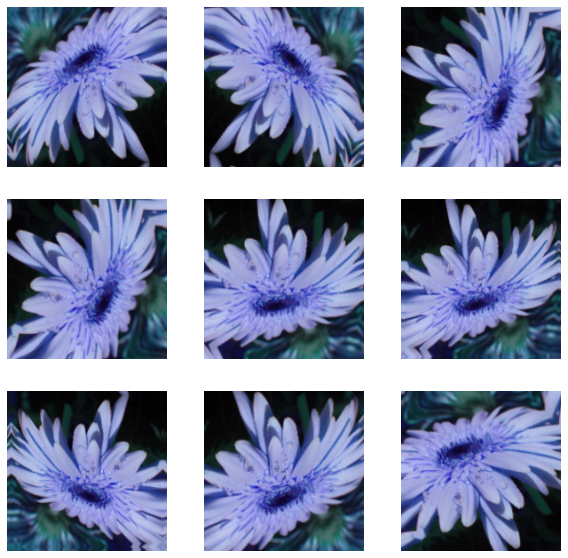

In [16]:
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(x)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0].numpy().astype("uint8"))
  plt.axis("off")

## Model Creation

In [22]:
num_classes = 5
model = keras.Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
18/18 [==============================] - 15s 751ms/step - loss: 0.0918 - accuracy: 0.9494
Epoch 2/5
18/18 [==============================] - 12s 691ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/5
18/18 [==============================] - 14s 795ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/5
18/18 [==============================] - 13s 721ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/5
18/18 [==============================] - 12s 692ms/step - loss: 0.0000e+00 - accuracy: 1.0000


In [23]:
num_classes = 5
model = keras.Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

## Compilation of model

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train a model

In [25]:
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
18/18 [==============================] - 11s 588ms/step - loss: 0.0973 - accuracy: 0.9442
Epoch 2/5
18/18 [==============================] - 11s 587ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/5
18/18 [==============================] - 12s 662ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/5
18/18 [==============================] - 12s 635ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/5
18/18 [==============================] - 11s 622ms/step - loss: 0.0000e+00 - accuracy: 1.0000


## Saving model

In [26]:
import joblib as jbl

In [29]:
filename = "Completed_model.pkl"
jbl.dump(model, filename)

['Completed_model.pkl']

## Load model

In [30]:
model=jbl.load("Completed_model.pkl")

## Model Evaluation

In [32]:
model.evaluate(X_test_scaled,y_test)

6/6 [==============================] - 1s 177ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]